In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [104]:
#load cleaned data
df = pd.read_csv('../../data/processed/cleaned_data.csv')
print(f"\nFirst 5 rows:")
df.head()


First 5 rows:


,patient_id,cycle_number,Age,Protocol,AMH,n_Follicles,E2_day5,AFC,Patient Response,age_group,amh_category,follicle_afc_ratio
0,25001,1,37,flexible antagonist,1.87,16,930.13,12,high,advanced,normal,1.23
1,25002,2,24,fixed antagonist,1.18,5,1974.21,8,low,young,normal,0.56
2,25003,1,32,fixed antagonist,1.35,5,846.31,7,low,middle,normal,0.62
3,25004,1,24,flexible antagonist,1.81,18,351.81,17,optimal,young,normal,1.00
4,25005,2,24,flexible antagonist,1.04,9,606.70,8,low,young,normal,1.00


In [105]:
# Data Overview
print(f"\nTotal Patients: {len(df)}")
print(f"Total Features: {len(df.columns)}")
print(f"\nColumns: {list(df.columns)}")

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())


Total Patients: 501
Total Features: 12

Columns: ['patient_id', 'cycle_number', 'Age', 'Protocol', 'AMH', 'n_Follicles', 'E2_day5', 'AFC', 'Patient Response', 'age_group', 'amh_category', 'follicle_afc_ratio']

Data Types:
patient_id              int64
cycle_number            int64
Age                     int64
Protocol               object
AMH                   float64
n_Follicles             int64
E2_day5               float64
AFC                     int64
Patient Response       object
age_group              object
amh_category           object
follicle_afc_ratio    float64
dtype: object

Missing Values:
patient_id            0
cycle_number          0
Age                   0
Protocol              0
AMH                   0
n_Follicles           0
E2_day5               0
AFC                   0
Patient Response      0
age_group             0
amh_category          0
follicle_afc_ratio    0
dtype: int64


In [106]:
#Summary Statistics - Numerical Features
numerical_cols = ['Age', 'AMH', 'n_Follicles', 'E2_day5', 'AFC', 'cycle_number']
numerical_cols = [col for col in numerical_cols if col in df.columns]

df[numerical_cols].describe()

,Age,AMH,n_Follicles,E2_day5,AFC,cycle_number
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,31.736527,2.351058,16.489022,1232.652828,12.475050,1.441118
std,4.649994,1.476652,10.331040,1152.717358,5.580132,0.659565
min,24.000000,0.100000,1.000000,29.160000,2.000000,1.000000
25%,28.000000,1.040000,8.000000,563.640000,8.000000,1.000000
50%,32.000000,2.260000,15.000000,790.870000,12.000000,1.000000
75%,35.000000,3.230000,23.000000,1155.270000,16.000000,2.000000
max,45.000000,6.530000,46.000000,4998.000000,29.000000,3.000000


In [107]:
#Categorical Features Distribution
print("\n1. Protocol Distribution:")
print(df['Protocol'].value_counts())
print("\nPercentages:")
print(df['Protocol'].value_counts(normalize=True) * 100)

print("\n2. Patient Response Distribution:")
print(df['Patient Response'].value_counts())
print("\nPercentages:")
response_pct = df['Patient Response'].value_counts(normalize=True) * 100
print(response_pct)


1. Protocol Distribution:
Protocol
flexible antagonist    222
fixed antagonist       160
agonist                119
Name: count, dtype: int64

Percentages:
Protocol
flexible antagonist    44.311377
fixed antagonist       31.936128
agonist                23.752495
Name: proportion, dtype: float64

2. Patient Response Distribution:
Patient Response
optimal    226
low        153
high       122
Name: count, dtype: int64

Percentages:
Patient Response
optimal    45.109780
low        30.538922
high       24.351297
Name: proportion, dtype: float64


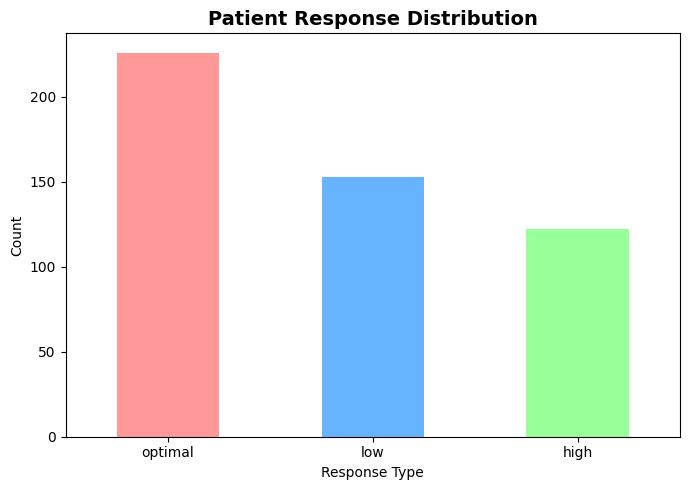

Class balance: Low=30.5%, Optimal=45.1%, High=24.4%


In [108]:
# Visualize Class Balance
fig, axes = plt.subplots(1, 1, figsize=(7, 5)) 
# Count plot
df['Patient Response'].value_counts().plot(kind='bar',ax=axes,color=['#ff9999', '#66b3ff', '#99ff99'])
axes.set_title('Patient Response Distribution', fontsize=14, fontweight='bold')
axes.set_xlabel('Response Type')
axes.set_ylabel('Count')
axes.set_xticklabels(axes.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()
print(f"Class balance: Low={response_pct['low']:.1f}%, "f"Optimal={response_pct['optimal']:.1f}%, "f"High={response_pct['high']:.1f}%")


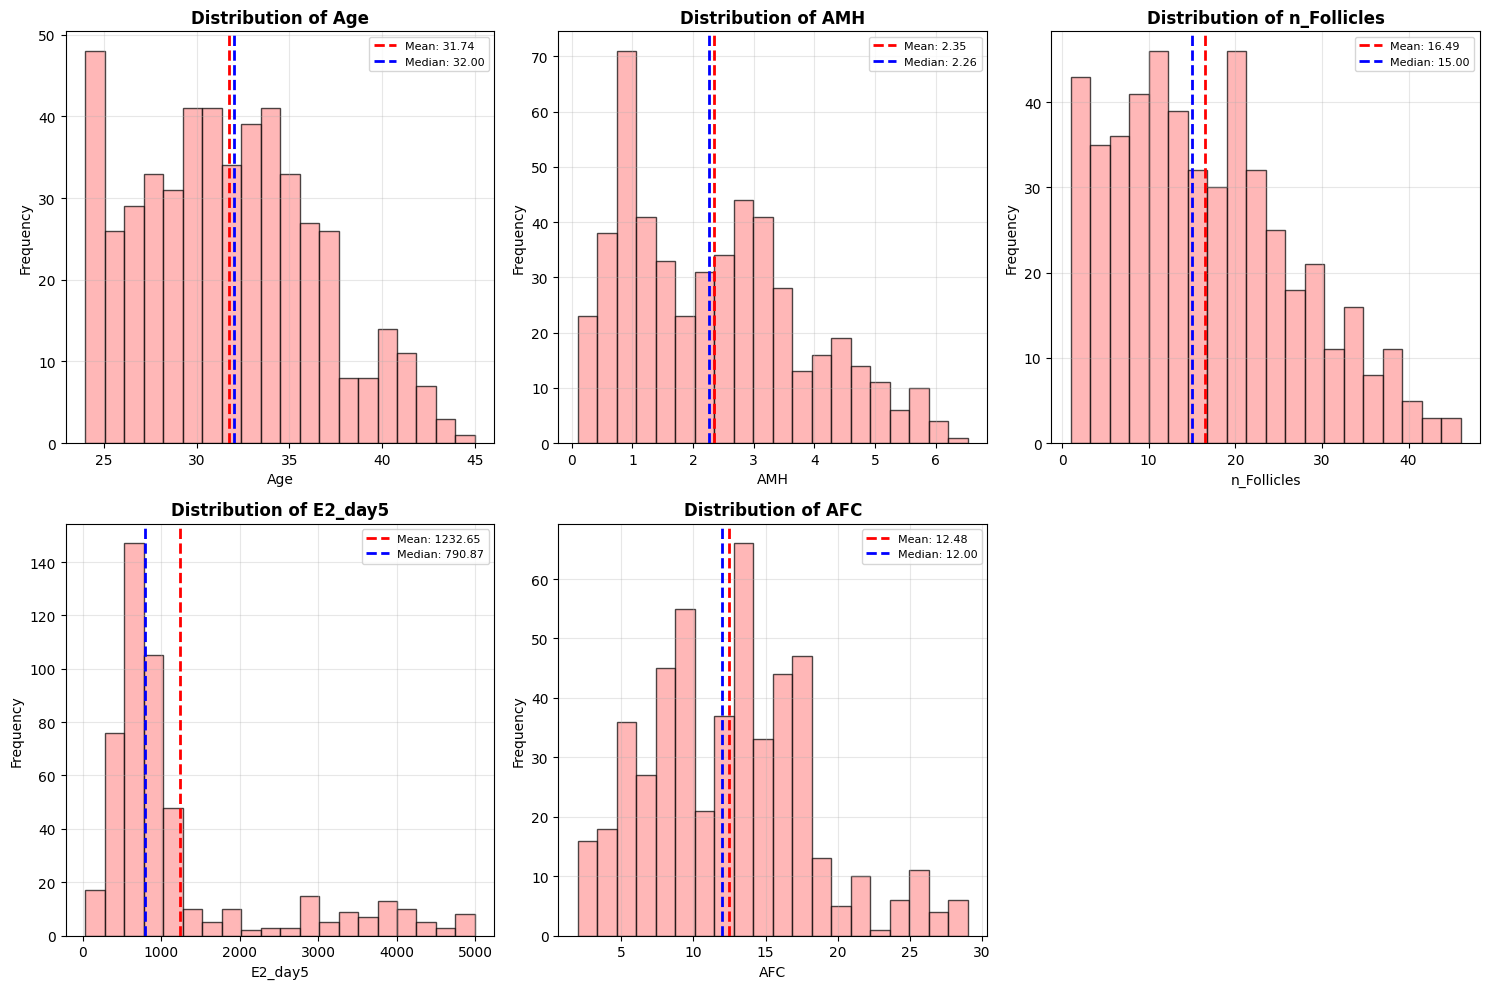

In [109]:
# Feature Distributions
numerical_cols = ['Age', 'AMH', 'n_Follicles', 'E2_day5', 'AFC']
numerical_cols = [col for col in numerical_cols if col in df.columns]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Histogram
    df[col].hist(bins=20, alpha=0.7, ax=ax, edgecolor='black', color='#ff9999')
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='blue', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)

# Remove extra subplot
if len(numerical_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


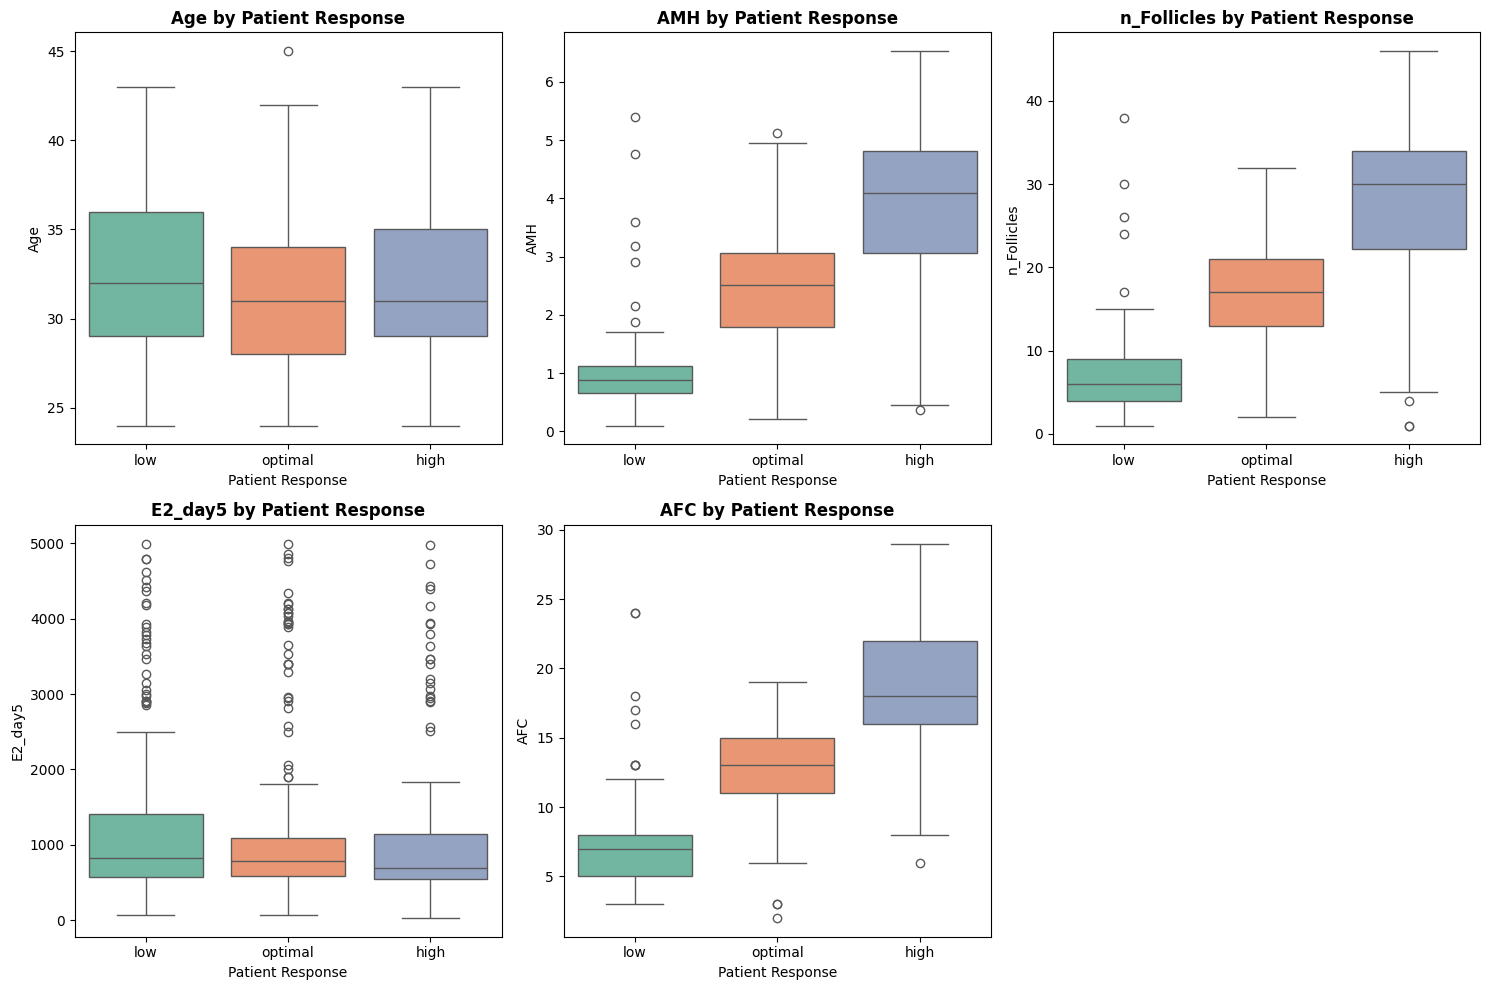

In [110]:
#Features by Patient Response (Box Plots)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    sns.boxplot(data=df, x='Patient Response', y=col, order=['low', 'optimal', 'high'],palette='Set2' ,ax=ax)
    ax.set_title(f'{col} by Patient Response', fontsize=12, fontweight='bold')
    ax.set_xlabel('Patient Response')
    ax.set_ylabel(col)

if len(numerical_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [111]:
# Statistical Tests - ANOVA
print("ANOVA TESTS - Do features differ by response group?")
for col in numerical_cols:
    groups = []
    for response in ['low', 'optimal', 'high']:
        group_data = df[df['Patient Response'] == response][col].dropna()
        groups.append(group_data)
    
    if len(groups) == 3:
        f_stat, p_value = stats.f_oneway(*groups)
        significance = "* * *" if p_value < 0.001 else "* *" if p_value < 0.01 else "*" if p_value < 0.05 else "Not Significant"
        print(f"{col:15s}: F={f_stat:6.2f}, p={p_value:.4f} {significance}")

print("\nLegend: * * * p<0.001 = very strong difference | * * p<0.01 = strong difference | * p<0.05 = weak difference| not significant")

ANOVA TESTS - Do features differ by response group?
Age            : F=  3.29, p=0.0381 *
AMH            : F=302.98, p=0.0000 * * *
n_Follicles    : F=312.17, p=0.0000 * * *
E2_day5        : F=  1.16, p=0.3141 Not Significant
AFC            : F=317.78, p=0.0000 * * *

Legend: * * * p<0.001 = very strong difference | * * p<0.01 = strong difference | * p<0.05 = weak difference| not significant


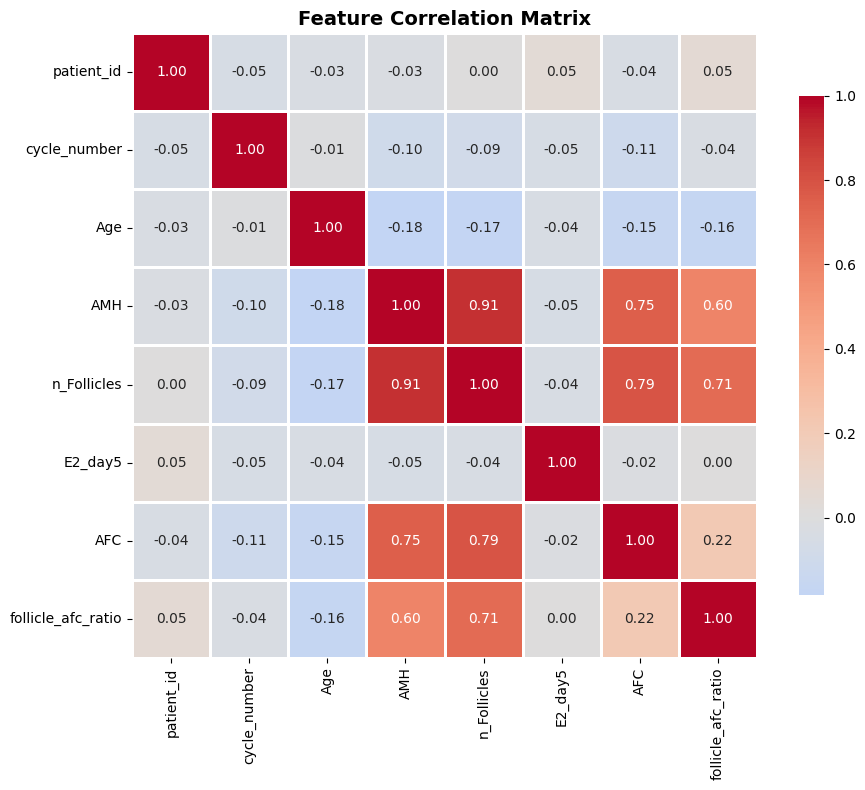


Strong Correlations (|r| > 0.5):
  AMH <--> n_Follicles: 0.91
  AMH <--> AFC: 0.75
  AMH <--> follicle_afc_ratio: 0.60
  n_Follicles <--> AFC: 0.79
  n_Follicles <--> follicle_afc_ratio: 0.71


In [112]:
# Correlation Matrix
# Select numerical columns
numerical_features = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
           center=0, square=True, linewidths=1,
           cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
# Find strong correlations
print("\nStrong Correlations (|r| > 0.5):")
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            print(f"  {corr_matrix.columns[i]} <--> {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.2f}")

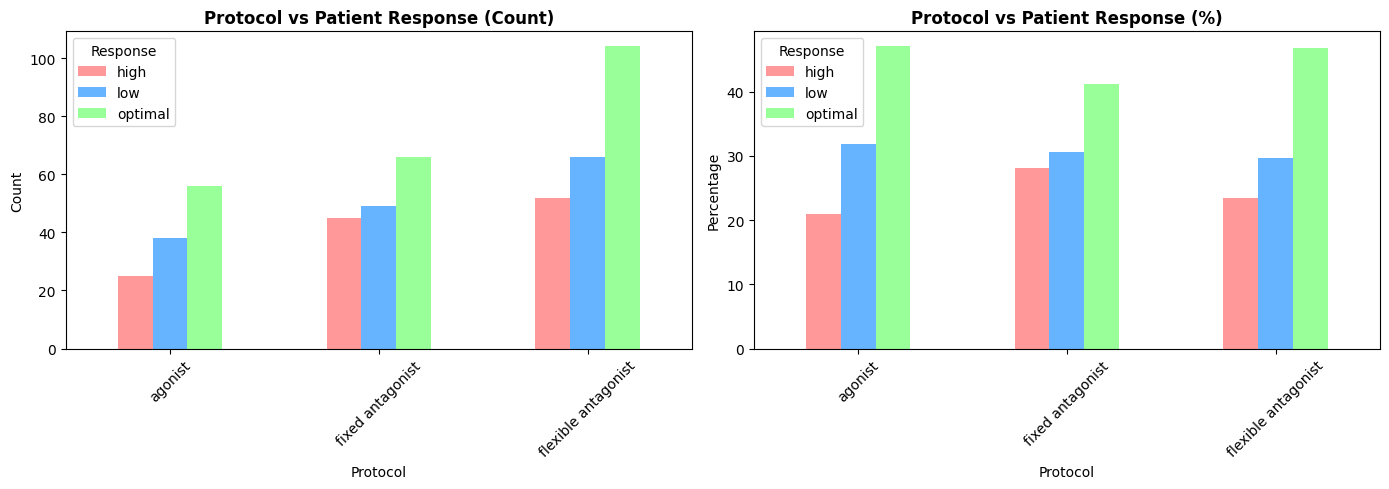

CHI-SQUARE TEST - Protocol vs Response
Chi2=2.46, p=0.6516 not significant


In [113]:
# Protocol vs Response Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Count plot
protocol_response = pd.crosstab(df['Protocol'], df['Patient Response'])
protocol_response.plot(kind='bar', ax=axes[0], color=['#ff9999', '#66b3ff', '#99ff99'])
axes[0].set_title('Protocol vs Patient Response (Count)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Protocol')
axes[0].set_ylabel('Count')
axes[0].legend(title='Response')
axes[0].tick_params(axis='x', rotation=45)
# Percentage plot
protocol_response_pct = pd.crosstab(df['Protocol'], 
                                    df['Patient Response'], 
                                    normalize='index') * 100
protocol_response_pct.plot(kind='bar', ax=axes[1], color=['#ff9999', '#66b3ff', '#99ff99'])
axes[1].set_title('Protocol vs Patient Response (%)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Protocol')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Response')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Chi-square test
print("CHI-SQUARE TEST - Protocol vs Response")
contingency_table = pd.crosstab(df['Protocol'], df['Patient Response'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "not significant"
print(f"Chi2={chi2:.2f}, p={p_value:.4f} {significance}")


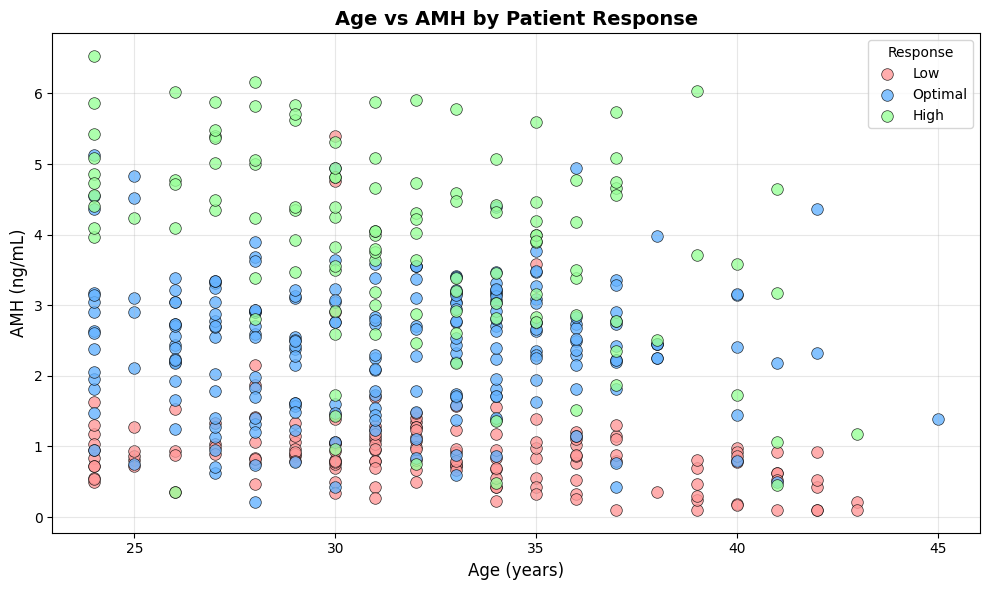

In [114]:
#Age vs AMH Scatter Plot
plt.figure(figsize=(10, 6))

colors = {'low': '#ff9999', 'optimal': '#66b3ff', 'high': '#99ff99'}

for response in ['low', 'optimal', 'high']:
    subset = df[df['Patient Response'] == response]
    plt.scatter(subset['Age'], subset['AMH'], 
               label=response.capitalize(), 
               alpha=0.8, s=70, 
               color=colors[response],
               edgecolors='black', linewidth=0.5)

plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('AMH (ng/mL)', fontsize=12)
plt.title('Age vs AMH by Patient Response', fontsize=14, fontweight='bold')
plt.legend(title='Response')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [115]:
#Medical Insights Summary
print("MEDICAL INSIGHTS SUMMARY")

# Age by response
print("\n1. Average Age by Response:")
age_by_response = df.groupby('Patient Response')['Age'].mean()
for response, age in age_by_response.items():
    print(f"   {response.capitalize():10s}: {age:.1f} years")

# AMH by response
print("\n2. Average AMH by Response:")
amh_by_response = df.groupby('Patient Response')['AMH'].mean()
for response, amh in amh_by_response.items():
    print(f"   {response.capitalize():10s}: {amh:.2f} ng/mL")

# Follicles by response
print("\n3. Average Follicles Retrieved by Response:")
follicles_by_response = df.groupby('Patient Response')['n_Follicles'].mean()
for response, fol in follicles_by_response.items():
    print(f"   {response.capitalize():10s}: {fol:.1f} follicles")

# AFC by response
print("\n4. Average AFC by Response:")
afc_by_response = df.groupby('Patient Response')['AFC'].mean()
for response, afc in afc_by_response.items():
    print(f"   {response.capitalize():10s}: {afc:.1f} follicles")

# Protocol success rates
print("\n5. Protocol Success Rates (% Optimal + High):")
protocol_success = pd.crosstab(df['Protocol'], df['Patient Response'], normalize='index') * 100
for protocol in protocol_success.index:
    optimal_high = protocol_success.loc[protocol, ['optimal', 'high']].sum()
    print(f"   {protocol:25s}: {optimal_high:.1f}%")


MEDICAL INSIGHTS SUMMARY

1. Average Age by Response:
   High      : 31.7 years
   Low       : 32.5 years
   Optimal   : 31.3 years

2. Average AMH by Response:
   High      : 3.92 ng/mL
   Low       : 0.96 ng/mL
   Optimal   : 2.45 ng/mL

3. Average Follicles Retrieved by Response:
   High      : 27.9 follicles
   Low       : 7.0 follicles
   Optimal   : 16.8 follicles

4. Average AFC by Response:
   High      : 18.5 follicles
   Low       : 7.2 follicles
   Optimal   : 12.7 follicles

5. Protocol Success Rates (% Optimal + High):
   agonist                  : 68.1%
   fixed antagonist         : 69.4%
   flexible antagonist      : 70.3%


In [116]:
# Key Findings Summary
print("KEY FINDINGS")
findings = [
    f"Dataset contains {len(df)} patients with {len(df.columns)} features",
    f"Class distribution: Low={response_pct['low']:.1f}%, Optimal={response_pct['optimal']:.1f}%, High={response_pct['high']:.1f}%",
    "AMH and AFC show strong correlation with patient response",
    "Age shows inverse relationship with ovarian reserve markers",
    "Protocol choice may influence outcomes (Chi-square test significance)"
]

for idx, finding in enumerate(findings, 1):
    print(f"{idx}. {finding}")

KEY FINDINGS
1. Dataset contains 501 patients with 12 features
2. Class distribution: Low=30.5%, Optimal=45.1%, High=24.4%
3. AMH and AFC show strong correlation with patient response
4. Age shows inverse relationship with ovarian reserve markers
5. Protocol choice may influence outcomes (Chi-square test significance)
